In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [2]:
data=pd.read_csv('dataset\\titanic_train.csv')

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Exploratory Data Analysis**

**Missin Data**

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visually we can find missing values


<AxesSubplot: >

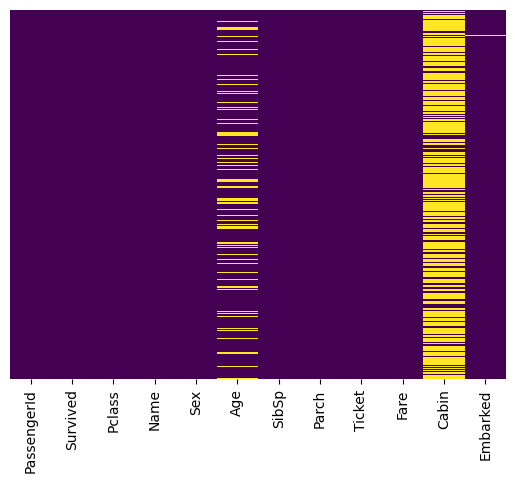

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
def univariable(variables):
    sns.set_style('whitegrid')
    
    ax=sns.countplot(x=variables,data=data)
    ax.bar_label(ax.containers[0])
    plt.title('Value Count of', variables) 

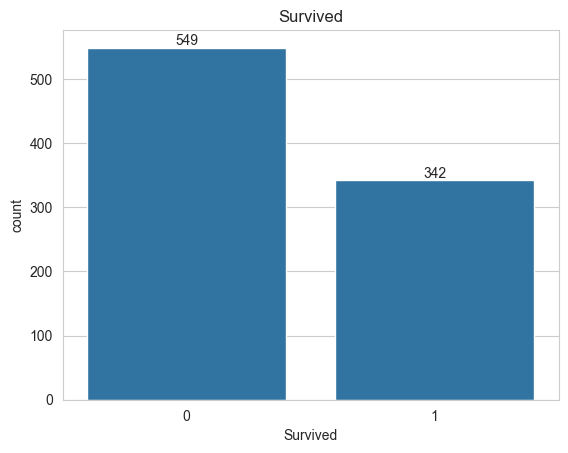

In [9]:
univariable('Survived')

From this plot, we can say that 549 peoples are not survived and 342 are survived.

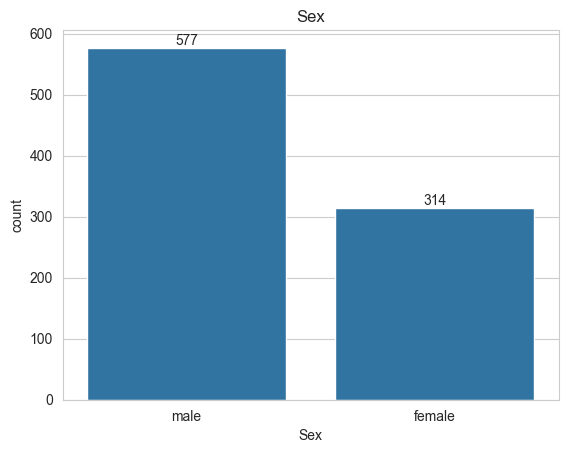

In [10]:
univariable('Sex')

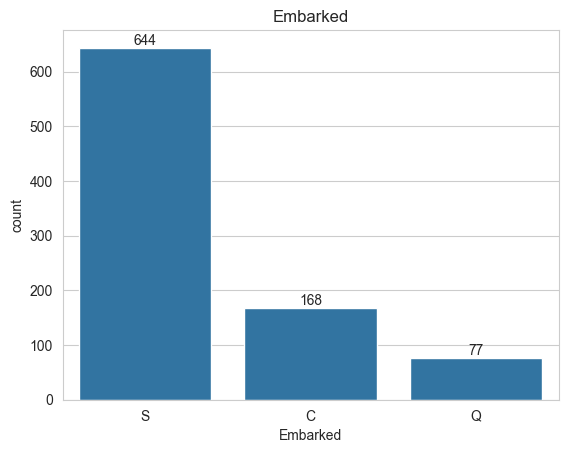

In [11]:
univariable('Embarked')

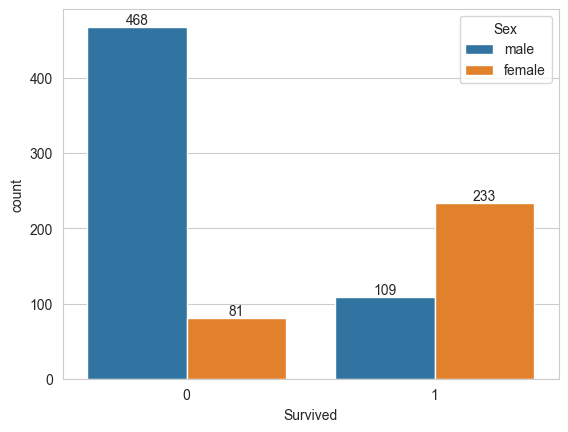

In [12]:
sns.set_style('whitegrid')
a=sns.countplot(x='Survived',hue='Sex',data=data)
for i in a.containers:
    a.bar_label(i)


Most of the males are not survived

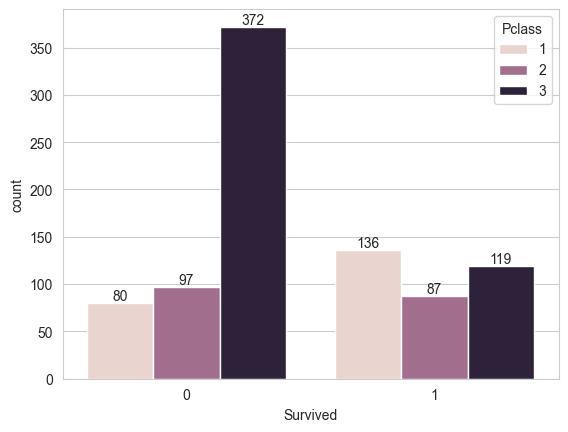

In [13]:
sns.set_style('whitegrid')
b=sns.countplot(x='Survived',hue='Pclass',data=data)
for i in b.containers:
    b.bar_label(i)

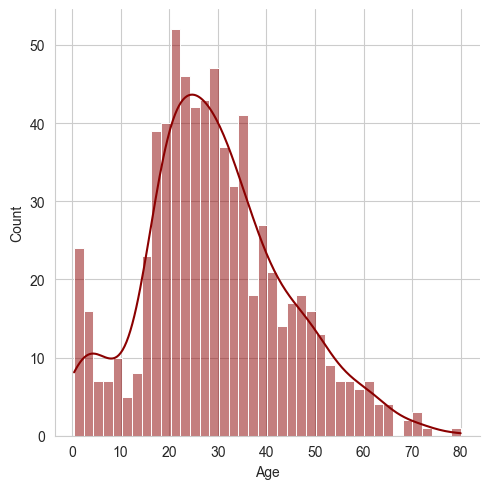

In [14]:
#Distribution of data

sns.displot(data['Age'].dropna(),kde=True,color='darkred',bins=40)

[Text(0, 0, '608'),
 Text(0, 0, '209'),
 Text(0, 0, '28'),
 Text(0, 0, '16'),
 Text(0, 0, '18'),
 Text(0, 0, '5'),
 Text(0, 0, '7')]

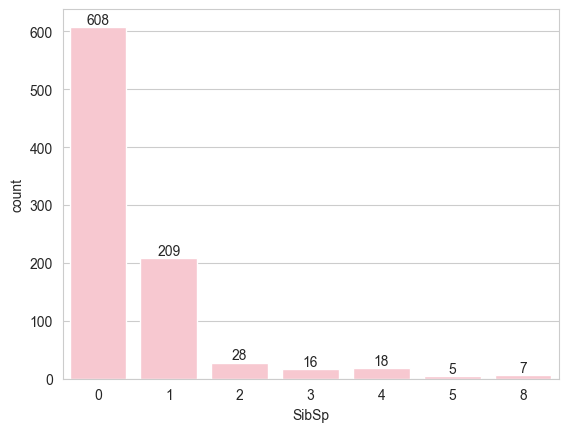

In [15]:
b=sns.countplot(x='SibSp',data=data,color='pink')
b.bar_label(b.containers[0])

**DATA CLEANING**

In [16]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

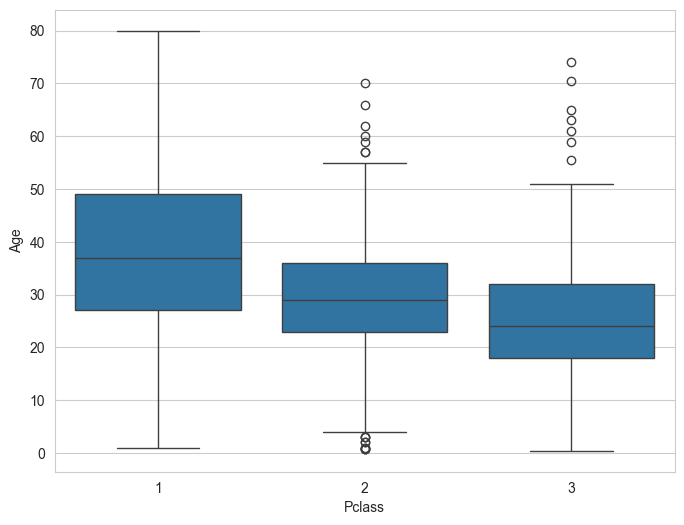

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=data)

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [19]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_344\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\USER\AppData\Local\Temp\ipykernel_344\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<AxesSubplot: >

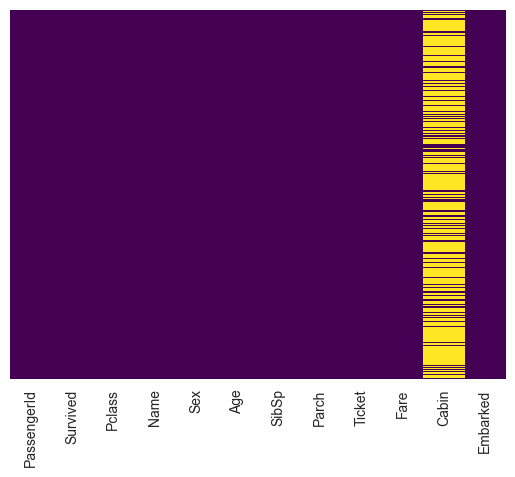

In [20]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
data.drop('Cabin',axis=1,inplace=True)

<AxesSubplot: >

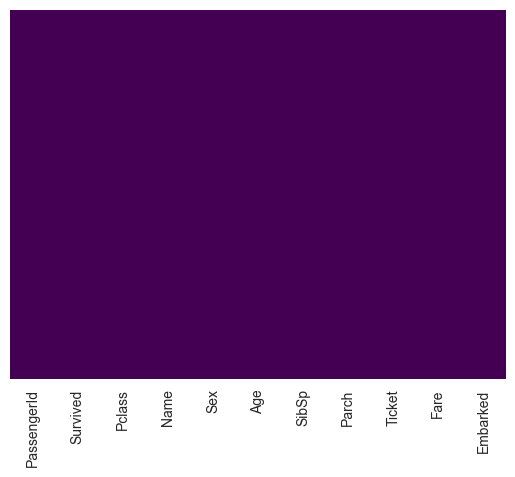

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**COnverting Categorical Features**

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
data['Sex']=data['Sex'].replace('male',0)
data['Sex']=data['Sex'].replace('female',1)

In [25]:
data['Embarked']=lb.fit_transform(data['Embarked'])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
